# Downloading files
Files should be in the same location as notebook

In [ ]:
# !unzip NewBonusData.zip

In [1]:
import pandas as pd

# def load_files():
#   for i in range(1,21):
#     try:
#       yield pd.read_csv(f'SSD2022AS2/raw_2022_09_{i:02}.csv', parse_dates=True, index_col='timestamp')
#     finally:      
#       continue


# data = pd.concat(load_files())
data = pd.read_csv(f'added.csv', parse_dates=True, index_col='timestamp')

# dropping categorical feature
# data = data.drop(['device'], axis=1)

# Profiling

In [2]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

client_user_id   
timestamp                                                   
2022-09-01 00:00:00  0302549e-5522-43e5-b2f2-0b470932a6fd  \
2022-09-01 00:00:05  0302549e-5522-43e5-b2f2-0b470932a6fd   
2022-09-01 00:00:10  0302549e-5522-43e5-b2f2-0b470932a6fd   
2022-09-01 00:00:15  0302549e-5522-43e5-b2f2-0b470932a6fd   
2022-09-01 00:00:20  0302549e-5522-43e5-b2f2-0b470932a6fd   

                                               session_id  dropped_frames   
timestamp                                                                   
2022-09-01 00:00:00  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0  \
2022-09-01 00:00:05  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   
2022-09-01 00:00:10  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   
2022-09-01 00:00:15  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   
2022-09-01 00:00:20  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   

                      FPS  bitrate   RTT  loss_rate  
timestamp                                            
2022-09-01 00:00:00  30.0   3636.0  64.0        0.0  
2022-09-01 00:00:05  30.0   3418.0  66.0        0.0  
2022-09-01 00:00:10  30.0   3596.0  62.0        0.0  
2022-09-01 00:00:15  30.0   3304.0  64.0        0.0  
2022-09-01 00:00:20  30.0   2893.0  64.0        0.0

The device feature is a categorical variable, hence encoding would be necessary later.

In [3]:
data.describe()

dropped_frames           FPS       bitrate           RTT     loss_rate
count    3.351430e+06  3.351430e+06  3.351430e+06  3.351430e+06  3.351430e+06
mean     1.699949e+05  3.253106e+01  7.163478e+03  6.101273e+01  4.442695e-01
std      1.481695e+07  1.094120e+01  6.339379e+03  2.662039e+02  3.358790e+00
min      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%      0.000000e+00  2.800000e+01  2.098000e+03  1.300000e+01  0.000000e+00
50%      0.000000e+00  3.000000e+01  5.873000e+03  3.000000e+01  0.000000e+00
75%      0.000000e+00  3.100000e+01  1.011900e+04  6.000000e+01  0.000000e+00
max      1.952806e+09  1.000000e+03  1.154460e+05  6.389200e+04  1.000000e+02

Also, data is on different scales, so we need to standardise the dataset.

In [ ]:
# UNCOMMENT THE NEXT LINE AND RUN THIS CELL TO BE ABLE TO USE pandas-profiling
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(data, title='AML Project', html={'style':{'full_width':True}})

<ipython-input-6-0f2f964ab847>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# profile.to_file(output_file="aml_project.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

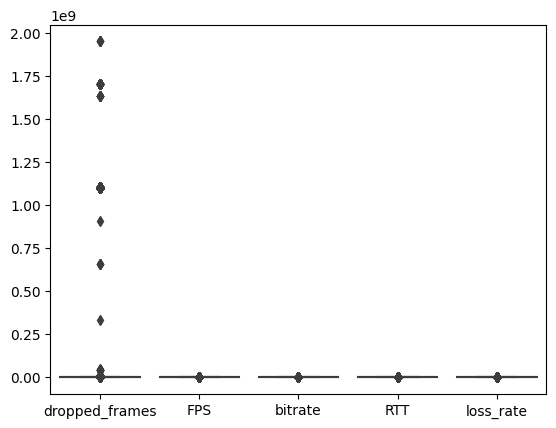

In [3]:
import seaborn as sns
import numpy as np

# Compute the IQR for each column
Q1 = data.quantile(0.01, numeric_only=True)
Q3 = data.quantile(0.99, numeric_only=True)
IQR = Q3 - Q1

# Compute the upper and lower bounds for each column
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find outliers in each column
outliers = pd.DataFrame(columns=data.columns)
for col in data.select_dtypes(include=[np.number]).columns:
    outliers = pd.concat([outliers, data[(data[col] < lower_bound[col]) | (data[col] > upper_bound[col])]])

# Plot the data using a box plot
sns.boxplot(data=data.select_dtypes(include=[np.number]))


<Axes: >

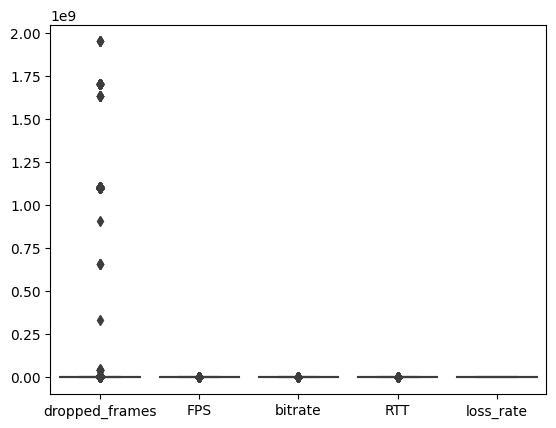

In [8]:
# Plot the outliers using a box plot
sns.boxplot(data=outliers)

In [9]:
len(outliers)/len(data)

0.010482943951282712

In [4]:
# Remove the outliers from the original dataset
data = data.drop(outliers.index)

# Verify that the outliers have been removed
# sns.boxplot(data=data.select_dtypes(include=[np.number]))

In [12]:
data.describe()

dropped_frames           FPS       bitrate           RTT     loss_rate
count    3.121356e+06  3.121356e+06  3.121356e+06  3.121356e+06  3.121356e+06
mean     5.771315e-01  3.266807e+01  7.164342e+03  4.839894e+01  2.620682e-01
std      5.525080e+00  1.067522e+01  6.324634e+03  6.223192e+01  1.505776e+00
min      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%      0.000000e+00  2.800000e+01  2.098000e+03  1.300000e+01  0.000000e+00
50%      0.000000e+00  3.000000e+01  5.881000e+03  2.900000e+01  0.000000e+00
75%      0.000000e+00  3.100000e+01  1.012600e+04  6.000000e+01  0.000000e+00
max      1.000000e+02  1.470000e+02  6.898800e+04  8.770000e+02  2.500000e+01

In [13]:
data[data["dropped_frames"] > 0].shape[0] / data.shape[0]

0.013547317255705533

## Encoding

In [36]:
# !pip install category_encoders

In [36]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=['device'])
data = encoder.fit_transform(data)

In [37]:
data.head()

client_user_id  \
timestamp                                                   
2022-09-01 00:00:00  0302549e-5522-43e5-b2f2-0b470932a6fd   
2022-09-01 00:00:05  0302549e-5522-43e5-b2f2-0b470932a6fd   
2022-09-01 00:00:10  0302549e-5522-43e5-b2f2-0b470932a6fd   
2022-09-01 00:00:15  0302549e-5522-43e5-b2f2-0b470932a6fd   
2022-09-01 00:00:20  0302549e-5522-43e5-b2f2-0b470932a6fd   

                                               session_id  dropped_frames  \
timestamp                                                                   
2022-09-01 00:00:00  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   
2022-09-01 00:00:05  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   
2022-09-01 00:00:10  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   
2022-09-01 00:00:15  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   
2022-09-01 00:00:20  b3aebc80-ff28-4569-bd18-2ace692f668e             0.0   

                      FPS  bitrate   RTT  loss_rate  
timestamp                                            
2022-09-01 00:00:00  30.0   3636.0  64.0        0.0  
2022-09-01 00:00:05  30.0   3418.0  66.0        0.0  
2022-09-01 00:00:10  30.0   3596.0  62.0        0.0  
2022-09-01 00:00:15  30.0   3304.0  64.0        0.0  
2022-09-01 00:00:20  30.0   2893.0  64.0        0.0

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def scale(df):
  # df.set_index('timestamp', inplace=True)
  ct = ColumnTransformer([("num_preprocess", StandardScaler(), ["dropped_frames", "FPS", "bitrate", "RTT", "loss_rate"])])
  df[["dropped_frames", "FPS", "bitrate", "RTT", "loss_rate"]] = ct.fit_transform(df)
  return df
data = scale(data)

## Imputing
From below result, we see that the dataset doesn't contain any null values, so no need for imputing.

In [15]:
data.isnull().sum()

client_user_id    0
session_id        0
dropped_frames    0
FPS               0
bitrate           0
RTT               0
loss_rate         0
dtype: int64

In [16]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [client_user_id, session_id, dropped_frames, FPS, bitrate, RTT, loss_rate]
Index: []

In [13]:
data = data.dropna()

In [14]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [client_user_id, session_id, dropped_frames, FPS, bitrate, RTT, loss_rate]
Index: []

In [15]:
data.isnull().sum()

client_user_id    0
session_id        0
dropped_frames    0
FPS               0
bitrate           0
RTT               0
loss_rate         0
dtype: int64

## Generating subsequence

To split the sequence, we do the following
*   Group the dataset by client user id and session id
*   Split each of the datasets from the groups into chunk of 24
*   If the size of the dataset is less than 24, we discard the dataset since chunks can't be formed. 
* In order to retain the sequence of each window, we group windows for a particularly sessionid into the same array and separate them from others.


In [6]:
import numpy as np
import pandas as pd

def generate_subset(data, subset_len):
    group = data.groupby(['client_user_id', 'session_id'])[['dropped_frames', 'FPS', 'bitrate', 'RTT', 'loss_rate']]
    
    for key, item in group:
        df = group.get_group(key)
        
        # Skip the group if there are not enough frames
        if len(df) < subset_len:
            continue
        
        for i in range(len(df) - subset_len + 1):
            window = df.iloc[i:i+subset_len]
            yield [window], item.iloc[i+subset_len-1]['dropped_frames']


group = generate_subset(data, 24)
group_list = list(group)
print(len(group_list))

3032487


## Plots

Plot a single subsequence

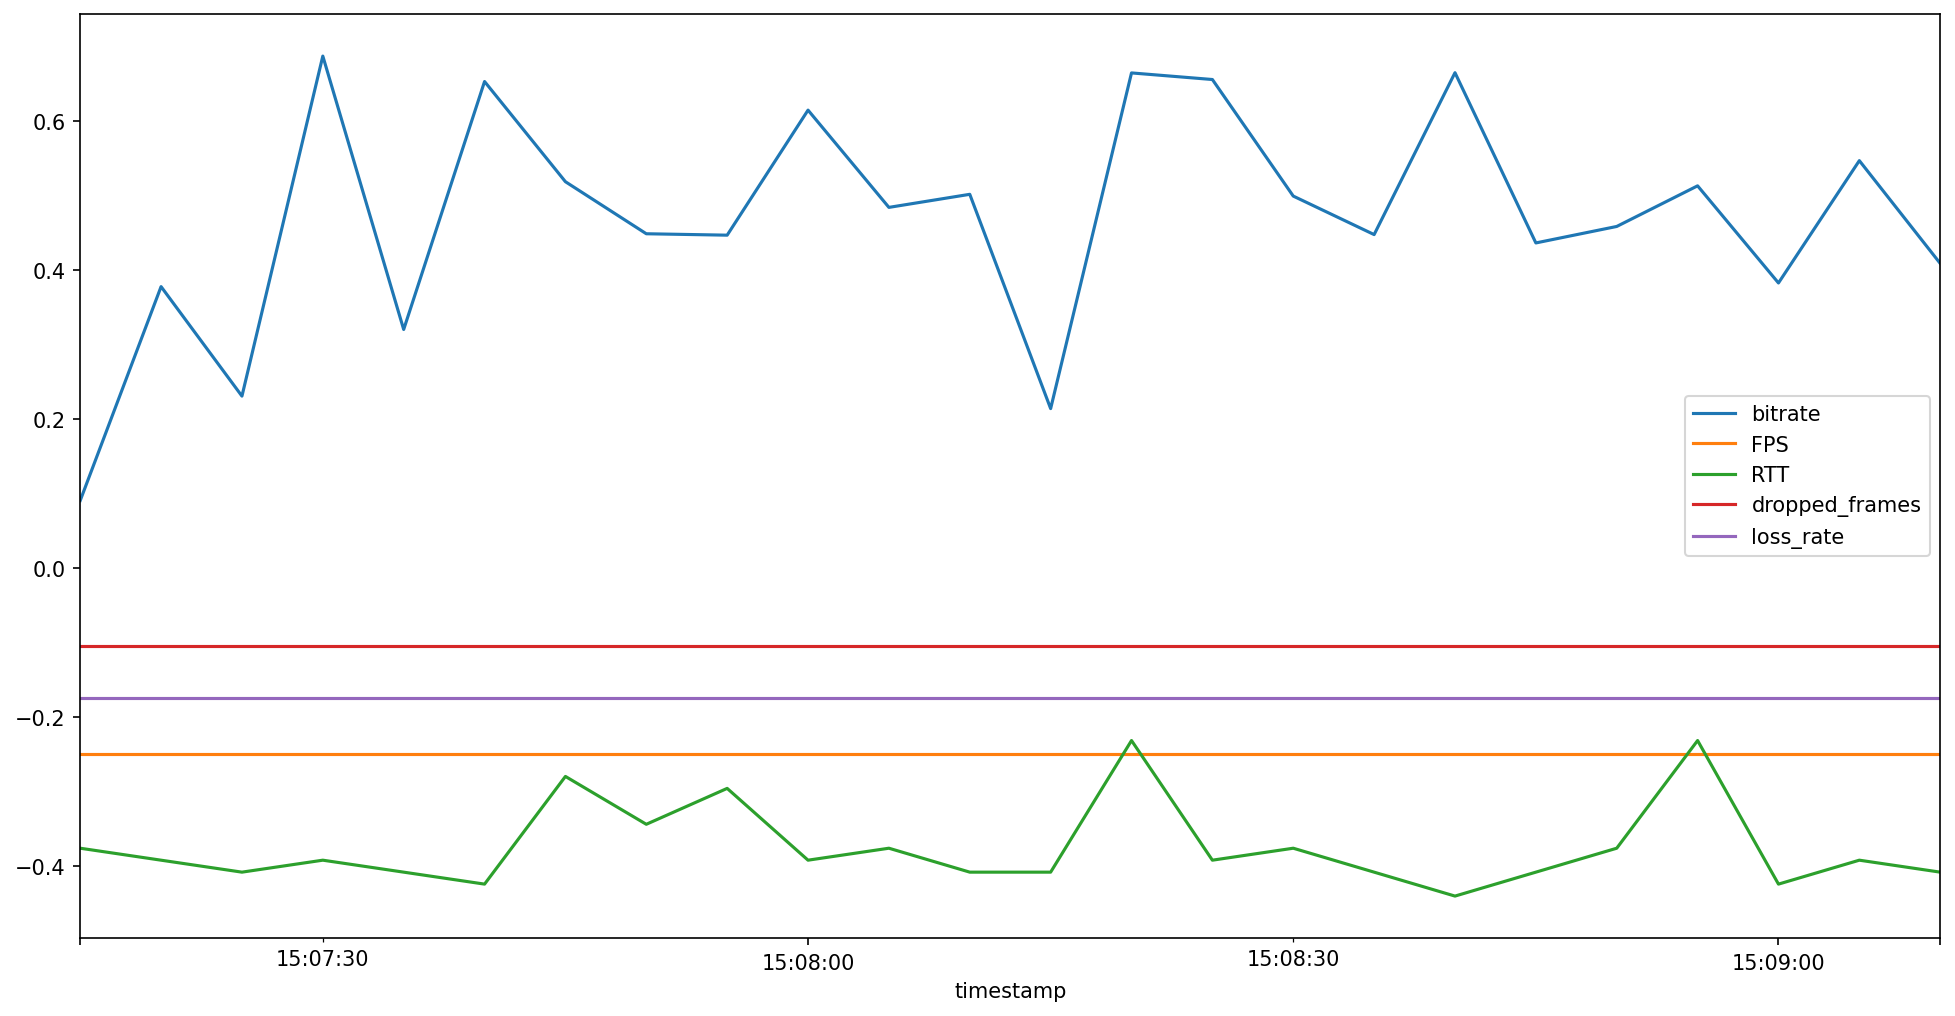

In [19]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16, 8), dpi=150)
ax = plt.gca()

subsequence, dropped_frames = random.choice(group_list)

# Create a new df by concatenating the windows in the subsequence
subsequence_df = pd.concat(subsequence)
subsequence_df['dropped_frames'] = dropped_frames

# Plot the data
subsequence_df.plot(y='bitrate', ax=ax)
subsequence_df.plot(y='FPS', ax=ax)
subsequence_df.plot(y='RTT', ax=ax)
subsequence_df.plot(y='dropped_frames', ax=ax)
subsequence_df.plot(y='loss_rate', ax=ax)

plt.legend()
plt.show()


In [20]:
for group in group_list:
    dfs, y = group
    for df in dfs:
        if df.isna().values.any():
            print("Found NaN values in the dataframe")
            break
    else:
        continue
    break
else:
    print("No NaN values found in any dataframes")

No NaN values found in any dataframes


# DCAE

## Pytorch Dataset
Creating a dataset from the list of subsequences to use to train the neural networks.
We split the dataset into a training dataset and validation dataset.

In [7]:
import torch

In [8]:
from torch.utils.data import Dataset, DataLoader, random_split

class MyDataset(Dataset):
    def __init__(self, group_list):
        l = len(group_list)
        self.x = [group_list[i][0][0].to_numpy() for i in range(l)]
        self.y = [group_list[i][1] for i in range(l)]
        
    def __getitem__(self, idx):
        return torch.from_numpy(self.x[idx]).float(), torch.Tensor([self.y[idx]])
    
    def __len__(self):
        return len(self.x)

# dataset = MyDataset(group_list)

# batch_size=256
# loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


Predifining methods to use in training

In [9]:
from torch import nn

class Encoder(nn.Module):
    
    def __init__(self):
      super().__init__()        
      self.model = nn.Sequential(
          nn.Conv1d(24, 32, 3, padding=1),
          nn.ReLU(),
          nn.Conv1d(32, 64, 3, padding=1),
          nn.ReLU(),
          nn.Conv1d(64, 128, 3, padding=1),
          nn.ReLU(),                                
          nn.Conv1d(128, 256, 3, padding=1),
          nn.ReLU(),
          nn.Conv1d(256, 512, 3, padding=1),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(512*5, 384),
          nn.ReLU(),
          nn.Linear(384,5)           
      )
    def forward(self, x):
        return self.model(x)

## Decoder

In [10]:
class Decoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(5, 384),          
        nn.ReLU(),
        nn.Linear(384, 512*5),
        nn.ReLU(),
        nn.Unflatten(dim=1,unflattened_size=(512, 5)),
        nn.ConvTranspose1d(512,256,3, padding=1),
        nn.ReLU(),
        nn.ConvTranspose1d(256,128,3, padding=1),
        nn.ReLU(),
        nn.ConvTranspose1d(128,64,3, padding=1), 
        nn.ReLU(),         
        nn.ConvTranspose1d(64,32,3, padding=1),        
        nn.ReLU(),        
        nn.ConvTranspose1d(32,24,3, padding=1),
    )
  def forward(self,x):
    return self.model(x)

## Pytorch lightning

In [11]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import random_split
import pytorch_lightning as pl
import numpy as np
from kmeans_pytorch import kmeans

In [12]:
class Autoencoder(pl.LightningModule):
    def __init__(self, lr = 0.001):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.lr = lr
        self.cuda = torch.device('cuda:0')
        
    def forward(self, x):
        return self.encoder(x)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)
    
    def kmeans_loss(self, emb):
        cluster_indices, cluster_centers = kmeans(X=emb, num_clusters=2, device=self.cuda)
        
        # Moving clusters to gpu, because library was made by clowns
        cluster_indices, cluster_centers = cluster_indices.to(self.cuda), cluster_centers.to(self.cuda)
        
        # Compute the distances between each data point and its assigned cluster center
        distances = torch.sum((emb - cluster_centers[cluster_indices]) ** 2, dim=1)
        
        # Compute the inertia (sum of squared distances)
        inertia = torch.sum(distances)
        return inertia

    def training_step(self, train_batch, batch_idx):
        x, _ = train_batch
        emb = self(x)
        x_hat = self.decoder(emb)
        loss = F.mse_loss(x_hat, x)
        loss_kmeans = self.kmeans_loss(emb)
        loss = loss + 0.1 * loss_kmeans
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        x, _ = val_batch
        emb = self(x)
        x_hat = self.decoder(emb)
        loss = F.mse_loss(x_hat, x)
        loss_kmeans = self.kmeans_loss(emb)
        loss = loss + 0.1 * loss_kmeans
        self.log('val_loss', loss, prog_bar=True)
        return loss

### Wiring

In [13]:
# Dataset
dataset = MyDataset(group_list)

# Dataloaders
train_size=0.9
batch_size = 256

train_size = int(len(dataset)*train_size)
val_size = len(dataset) - train_size
train, val = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train, batch_size=batch_size)
val_dataloader = DataLoader(val, batch_size=batch_size)

In [27]:
train_dataloader = DataLoader(train, batch_size=batch_size)
val_dataloader = DataLoader(val, batch_size=batch_size)

In [14]:
# # PL model
# module = LossRatePredictorDataModule(dataset, batch_size=batch_size)
# module.prepare_data()
# module.setup()
torch.set_float32_matmul_precision('medium')

# model
model = Autoencoder()

# training
trainer = pl.Trainer(max_epochs=1, accelerator="gpu", devices=1)
trainer.fit(model, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 1.5 M 
1 | decoder | Decoder | 1.5 M 
------------------------------------
3.0 M     Trainable params
0         Non-trainable params
3.0 M     Total params
12.095    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

C:\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 24.00it/s, center_shift=0.000012, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 144.36it/s, center_shift=0.000027, iteration=1, tol=0.000100]
C:\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 141.69it/s, center_shift=0.000027, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 0it [00:00, ?it/s, center_shift=0.000198, iteration=1, tol=0.000100]
[running kmeans]: 2it [00:00, 333.57it/s, center_shift=0.000008, iteration=2, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.31it/s, center_shift=0.000036, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.42it/s, center_shift=0.000009, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.59it/s, center_shift=0.000003, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.77it/s, center_shift=0.000006, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 147.90it/s, center_shift=0.000004, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 128.15it/s, center_shift=0.000005, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.73it/s, center_shift=0.000002, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.89it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 119.79it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 158.71it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.01it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 112.52it/s, center_shift=0.000002, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.39it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.84it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.26it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.62it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.31it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 157.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 170.96it/s, center_shift=0.000001, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 150.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 188.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 131.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 163.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 193.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 180.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 177.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 170.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 131.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 160.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 186.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 151.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 112.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 138.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 179.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 163.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 162.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 173.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 145.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 165.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 155.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 140.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 154.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 145.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 179.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 188.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 154.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 173.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 157.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 101.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 106.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 98.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 193.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 163.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 133.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 150.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 113.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 121.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 149.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 139.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 184.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 159.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 124.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 144.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 170.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 99.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 184.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 204.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 155.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 547.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 524.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 562.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 542.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 524.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 159.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 201.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 682.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 563.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 146.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 658.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 130.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 541.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 539.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 128.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 152.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 115.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 186.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 106.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 173.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 212.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 132.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 162.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 97.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 96.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 142.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 90.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 165.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 172.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 163.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 152.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 174.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 140.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 549.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 184.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 170.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 155.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 601.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 130.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 122.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 139.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 137.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 130.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 140.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 135.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 144.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 151.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 121.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 124.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 123.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 536.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 164.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 109.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 541.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 114.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 123.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 173.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 565.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 188.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 148.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 188.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 159.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 99.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 120.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 140.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 180.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 116.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 137.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 153.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 157.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 151.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 149.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 148.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 148.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 145.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 170.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 105.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 186.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 135.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 174.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 158.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 201.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 129.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 201.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 162.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 174.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 153.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 113.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 140.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 159.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 131.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 120.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 180.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 143.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 122.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 140.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 168.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 186.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 150.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 154.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 179.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 604.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 566.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 188.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 201.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 107.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 661.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 559.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 118.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 639.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 597.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 141.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 520.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 528.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 157.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 148.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 212.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 143.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 147.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 539.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 97.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 154.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 107.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 174.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 152.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 526.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 146.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 162.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 124.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 138.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 537.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 577.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 186.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 629.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 212.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 177.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 151.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 586.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 124.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 141.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 160.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 148.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 142.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 165.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 167.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 152.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 158.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 107.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 579.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 124.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 158.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 107.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 541.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 602.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 130.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 212.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 183.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 609.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 153.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 120.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 179.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 193.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 114.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 536.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 602.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 152.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 154.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 173.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 177.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 164.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 749.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 124.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 168.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 512.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 113.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 129.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 130.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 556.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 138.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 163.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 889.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 177.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 107.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 130.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 118.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 523.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 143.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 119.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 522.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 176.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 174.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 127.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 662.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 106.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 127.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 645.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 163.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 111.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 160.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 151.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 551.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 540.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 171.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 121.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 539.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 577.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 564.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 106.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 164.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 520.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 188.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 180.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 600.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 131.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 566.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 590.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 148.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 140.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 141.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 148.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 512.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 105.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 568.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 554.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 110.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 144.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 649.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 111.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 758.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 545.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 529.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 145.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 608.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 615.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 619.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 543.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 183.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 157.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 177.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 544.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 172.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 539.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 568.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 551.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 691.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 205.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 145.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 62.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 178.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 596.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 521.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 543.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 158.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 560.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 556.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 526.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 535.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 149.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 121.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 595.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 157.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 531.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 179.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 706.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 521.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 161.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 833.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 183.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 146.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 553.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 128.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 538.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 183.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 561.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 542.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 176.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 204.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 193.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 537.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 556.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 136.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 535.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 588.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 568.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 154.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 212.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 584.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 566.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 526.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 537.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 550.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 545.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 180.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 537.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 537.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 577.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 144.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 678.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 142.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 522.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 545.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 571.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 105.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 544.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 567.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 641.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 180.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 137.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 561.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 139.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 558.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 201.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 192.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 593.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 553.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 564.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 522.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 535.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 130.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 218.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 538.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 143.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 560.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 695.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 520.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 539.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 523.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 560.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 529.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 175.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 571.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 586.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 542.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 164.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 573.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 116.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 623.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 649.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 186.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 545.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 545.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 623.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 169.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 159.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 571.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 150.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 616.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 528.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 201.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 535.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 236.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 639.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 204.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 531.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 729.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 579.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 217.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 189.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 521.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 549.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 181.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 524.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 184.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 620.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 182.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 233.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 107.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 174.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 565.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 160.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 520.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 543.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 524.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 636.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 538.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 512.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 684.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 742.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 159.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 627.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 139.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 752.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 597.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 586.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 173.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 672.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 595.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 204.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 585.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 547.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 686.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 570.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 545.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 155.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 538.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 602.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 537.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 221.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 575.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 617.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 535.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 546.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 573.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 593.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 128.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 531.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 775.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 109.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 630.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 204.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 527.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 557.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 657.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 542.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 553.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 591.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 677.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 212.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 665.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 562.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 522.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 567.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 269.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 585.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 775.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 726.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 618.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 727.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 640.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 587.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 521.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 536.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 649.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 168.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 194.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 563.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 576.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 153.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 244.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 599.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 579.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 207.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 196.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 581.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 223.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 535.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 611.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 168.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 628.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 1279.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 201.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 166.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 571.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 535.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 562.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 109.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 686.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 709.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 568.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 722.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 567.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 593.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 180.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 531.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 844.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 680.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 654.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 241.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 526.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 213.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 188.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 574.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 645.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 553.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 258.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 521.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 179.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 575.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 187.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 528.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 751.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 578.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 604.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 243.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 560.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 215.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 216.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 191.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 208.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 601.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 522.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 563.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 271.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 573.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 513.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 617.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 554.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 773.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 197.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 526.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 293.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 110.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 206.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 522.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 530.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 277.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 209.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 571.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 607.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 531.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 609.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 523.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 195.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 264.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 836.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 199.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 528.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 520.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 755.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 562.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 578.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 548.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 698.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 224.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 558.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 565.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 440.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 602.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 566.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 534.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 211.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 540.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 533.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 531.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 248.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 538.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 263.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 303.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 728.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 222.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 640.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 540.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 507.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 409.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 559.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 200.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 202.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 198.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 598.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 453.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 226.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 261.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 607.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 789.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 270.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 548.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 394.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 229.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 190.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 155.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 661.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 479.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 481.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 519.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 203.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 251.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 523.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 554.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 193.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 622.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 240.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 280.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 582.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 317.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 281.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 443.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 567.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 265.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 567.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 204.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 565.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 520.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 268.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 436.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 521.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 572.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 376.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 686.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 253.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 544.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 599.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 407.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 630.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 557.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 518.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 366.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 523.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 536.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 492.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 412.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 566.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 356.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 296.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 532.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 462.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 290.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 727.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 606.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 574.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 398.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 286.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 397.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 361.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 362.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 238.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 662.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 358.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 706.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 272.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 904.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 387.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 447.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 259.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 657.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 382.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 266.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 406.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 525.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 267.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 569.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 314.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 662.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 345.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 156.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 323.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 516.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 540.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 798.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 318.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 210.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 480.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 426.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 237.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 469.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 520.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 364.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 284.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 186.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 179.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 604.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 405.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 282.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 379.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 512.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 457.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 225.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 346.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 568.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 818.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 418.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 309.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 549.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 508.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 509.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 860.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 403.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 485.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 549.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 273.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 363.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 420.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 547.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 400.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 465.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 404.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 450.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 557.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 350.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 611.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 630.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 285.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 452.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 352.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 471.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 429.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 262.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 468.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 372.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 458.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 524.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 279.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 134.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 389.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 383.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 250.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 230.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 527.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 231.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 395.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 466.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 401.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 551.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 125.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 463.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 442.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 470.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 478.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 247.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 368.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 472.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 661.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 656.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 288.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 349.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 360.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 585.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 482.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 449.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 547.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 351.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 503.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 424.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 448.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 391.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 427.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 425.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 386.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 256.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 374.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 242.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 355.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 228.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 299.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 454.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 227.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 511.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 490.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 274.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 339.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 428.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 422.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 413.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 464.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 411.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 408.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 506.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 370.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 249.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 417.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 491.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 312.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 661.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 444.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 419.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 326.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 310.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 611.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 338.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 325.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 369.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 393.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 708.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 255.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 498.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 246.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 329.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 302.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 441.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 342.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 276.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 365.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 586.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 460.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 396.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 483.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 295.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 260.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 536.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 354.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 416.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 220.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 505.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 414.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 291.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 474.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 380.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 381.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 348.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 357.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 319.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 497.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 446.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 300.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 385.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 334.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 377.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 292.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 494.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 294.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 392.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 278.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 477.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 484.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 475.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 275.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 421.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 476.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 219.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 495.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 330.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 327.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 561.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 347.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 335.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 388.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 390.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 306.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 486.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 315.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 305.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 435.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 437.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 301.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 515.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 340.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 402.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 434.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 322.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 328.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 384.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 343.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 681.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 321.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 311.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 514.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 423.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 451.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 316.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 234.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 239.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 378.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 308.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 252.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 313.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 581.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 489.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 289.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 415.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 214.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 504.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 493.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 287.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 487.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 367.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 488.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 373.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 359.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 496.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 445.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 331.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 324.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 432.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 332.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 619.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 375.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 456.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 257.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 587.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 353.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 439.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 431.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 336.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 500.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 473.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 304.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 502.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 235.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 337.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 499.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 433.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 410.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 341.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 510.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 430.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 501.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 307.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 467.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 297.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 517.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 455.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 438.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 371.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 232.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 459.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 298.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 344.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 461.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 399.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 185.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 320.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 254.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 283.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]


running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 1it [00:00, 245.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]


Validation: 0it [00:00, ?it/s]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 389.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 415.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 619.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 300.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 324.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 370.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 440.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 312.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 505.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 623.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 298.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 507.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 467.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 756.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 289.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 249.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 326.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 562.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 475.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 203.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 406.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 375.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 689.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 552.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 440.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 342.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 342.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 344.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 327.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 417.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 451.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 444.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 410.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 398.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 322.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 372.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 292.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 388.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 399.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 568.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 302.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 439.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 546.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 599.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 406.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 325.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 425.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 444.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 382.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 378.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 461.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 419.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 485.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 284.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 490.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 479.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 402.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 399.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 390.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 496.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 518.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 988.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 494.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 401.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 468.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 393.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 488.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 495.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 376.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 417.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 490.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 797.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 530.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 487.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 458.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 433.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 515.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 345.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 429.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 471.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 327.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 377.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 296.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 385.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 415.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 312.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 378.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 330.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 459.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 450.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 392.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 414.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 496.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 437.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 491.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 420.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 403.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 438.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 858.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 480.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 436.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 734.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 380.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 290.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 487.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 700.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 379.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 408.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 455.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 402.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 397.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 679.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 396.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 404.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 446.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 383.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 408.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 485.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 330.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 458.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 587.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 259.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 522.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 329.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 451.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 619.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 432.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 476.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 532.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 491.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 384.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 485.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 454.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 495.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 734.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 427.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 510.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 435.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 346.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 374.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 310.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 496.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 485.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 476.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 366.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 392.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 345.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 555.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 581.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 377.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 375.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 506.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 444.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 456.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 318.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 522.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 443.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 621.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 352.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 485.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 299.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 368.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 476.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 495.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 847.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 466.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 486.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 405.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 492.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 508.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 166.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 443.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 429.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 492.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 330.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 413.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 313.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 481.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 496.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 411.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 359.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 495.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 242.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 419.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 437.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 364.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 430.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 298.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 503.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 495.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 448.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 285.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 469.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 450.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 236.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 471.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 276.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 451.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 231.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 427.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 371.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 476.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 311.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 372.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 408.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 348.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 468.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 440.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 402.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 476.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 327.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 368.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 420.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 471.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 394.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 249.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 455.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 392.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 203.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 295.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 295.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 231.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 251.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 517.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 372.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 270.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 200.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 418.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 337.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 378.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 295.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 271.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 521.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 317.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 422.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 207.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 407.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 459.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 342.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 254.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 290.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 383.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 428.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 299.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 636.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 269.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 342.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 486.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 270.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 199.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 351.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 403.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 307.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 265.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 306.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 495.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 203.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 494.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 204.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 326.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 283.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 488.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 307.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 392.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 512.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 440.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 356.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 270.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 252.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 303.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 351.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 450.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 313.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 329.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 376.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 464.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 270.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 311.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 422.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 289.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 535.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 325.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 393.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 259.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 465.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 312.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 413.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 240.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 353.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 422.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 494.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 356.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 429.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 474.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 254.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 351.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 531.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 414.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 512.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 394.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 395.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 544.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 458.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 344.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 444.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 450.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 254.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 325.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 454.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 249.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 494.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 353.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 486.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 429.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 259.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 503.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 457.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 394.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 456.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 366.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 194.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 373.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 474.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 484.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 359.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 459.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 436.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 430.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 376.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 346.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 358.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 407.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 279.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 380.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 414.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 406.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 310.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 269.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 394.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 289.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 339.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 339.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 484.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 423.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 295.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 480.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 319.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 300.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 475.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 232.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 304.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 438.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 326.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 449.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 312.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 253.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 209.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 438.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 274.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 344.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 319.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 457.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 452.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 511.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 253.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 390.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 397.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 200.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 419.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 464.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 432.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 480.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 410.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 508.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 200.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 307.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 404.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 365.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 297.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 299.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 398.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 222.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 414.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 233.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 653.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 311.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 360.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 462.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 377.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 291.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 475.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 457.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 311.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 352.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 315.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 142.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 252.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 181.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 593.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 403.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 312.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 422.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 330.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 451.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 276.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 222.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 277.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 425.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 307.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 401.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 324.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 473.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 238.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 296.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 242.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 347.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 252.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 247.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 273.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 211.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 354.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 496.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 471.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 297.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 325.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 315.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 469.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 503.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 307.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 327.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 462.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 411.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 482.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 405.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 474.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 296.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 237.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 299.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 267.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 518.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 363.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 377.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 339.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 430.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 274.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 201.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 349.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 390.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 303.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 212.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 384.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 427.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 375.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 323.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 269.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 436.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 403.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 274.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 197.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 253.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 323.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 345.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 526.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 239.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 317.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 456.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 325.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 400.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 465.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 300.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 269.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 307.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 249.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 444.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 248.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 364.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 303.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 293.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 317.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 470.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 234.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 390.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 369.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 490.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 351.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 441.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 330.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.57it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 247.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 386.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 405.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 462.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 350.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 337.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 364.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 302.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 474.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 368.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 264.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 215.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 506.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 470.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 441.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 407.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 492.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 469.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 603.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 200.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 282.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 222.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 349.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 366.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 439.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 495.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.16it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 414.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 369.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 420.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 373.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 441.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 431.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 326.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 313.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 367.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 330.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 262.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 303.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 450.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 482.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 249.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 236.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 289.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 387.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 464.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 263.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 317.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 493.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 261.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 201.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 253.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 300.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 471.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 254.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 482.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 227.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 246.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 256.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 386.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 417.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 329.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 367.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.58it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 284.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 318.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 445.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 281.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 276.14it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 280.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 585.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 255.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 497.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 399.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 328.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 243.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 395.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 306.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 328.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 610.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 370.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 206.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 288.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 202.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 405.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 256.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 329.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 367.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 471.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 325.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.35it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 201.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 353.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 309.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 247.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 318.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 411.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 322.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 314.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 346.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 249.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 278.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.72it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 377.93it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 374.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 319.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 324.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 361.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 432.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 290.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 488.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 224.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 383.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 376.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.63it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 280.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 302.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 434.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 284.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 507.66it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 312.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 406.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 373.59it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 414.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 403.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 502.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 325.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 328.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 425.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 300.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 328.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 188.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 386.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 347.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 339.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.74it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 349.06it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 461.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 198.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 465.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 429.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 283.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 508.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 458.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 406.70it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 454.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 457.89it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 250.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 379.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 349.82it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 459.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 255.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 318.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 479.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 416.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 600.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 268.92it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 432.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 428.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 318.64it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 434.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 336.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 293.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 255.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.99it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 222.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.41it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 545.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 342.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 493.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 171.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 233.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 731.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 299.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 294.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 682.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 458.09it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 475.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 315.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 229.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 125.30it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 328.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 285.37it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 503.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 316.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 374.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 396.81it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 588.43it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 213.18it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 341.31it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 449.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 352.67it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 441.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 293.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 506.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 343.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 317.01it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.86it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 271.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 395.02it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 283.04it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 427.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.53it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 610.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 199.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 332.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.07it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 255.98it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 445.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 398.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 381.68it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 206.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 114.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 266.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 420.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 451.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 354.13it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 288.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 337.54it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 505.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 403.61it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 289.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 312.29it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 415.73it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 494.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 475.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 490.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 501.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 377.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 432.76it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 470.32it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.27it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 305.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 480.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 405.95it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 500.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 509.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 342.36it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 343.60it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 358.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 243.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 489.19it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 353.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 472.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.20it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 309.15it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 484.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 306.96it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 346.12it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 389.48it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 331.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 313.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 284.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 412.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 459.85it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 468.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 474.84it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 202.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 318.52it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 484.22it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.78it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.55it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 339.34it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 453.49it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..





[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 306.38it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 499.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 410.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.05it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 346.87it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 213.21it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 277.75it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 321.25it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 308.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 298.51it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 394.28it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 363.11it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 408.24it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 271.90it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.40it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 357.42it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 596.80it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.47it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 417.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 338.77it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 491.65it/s, center_shift=0.000000, iteration=1, tol=0.000100]A

running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 409.00it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 294.71it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 340.45it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 335.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 241.44it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 389.08it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 302.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 402.83it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 167.50it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 320.62it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 333.33it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 326.46it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 200.03it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 493.91it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 317.17it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 334.39it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 297.79it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 370.69it/s, center_shift=0.000000, iteration=1, tol=0.000100]A


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 1it [00:00, 498.97it/s, center_shift=0.000000, iteration=1, tol=0.000100]A
`Trainer.fit` stopped: `max_epochs=1` reached.


## Training

In [76]:
import torch
import torch.optim as optim
from sklearn.cluster import KMeans

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

encoder = Encoder().to(device)
decoder = Decoder().to(device)

params_to_optimize = [
    {'params': encoder.parameters()},
    {'params': decoder.parameters()}
]


optim = torch.optim.SGD(params_to_optimize, lr=0.0001, weight_decay=1e-05)

def loss(output, target, embedding):
  kmeans = KMeans(n_clusters=2, n_init='auto').fit(embedding.cpu().detach().numpy())  
  kmeans_inertia = kmeans.inertia_
  loss = torch.nn.MSELoss()(output, target)
  return loss, kmeans_inertia 

In [77]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# def loss(output, target, embedding):
#     embedding = np.nan_to_num(embedding.cpu().detach().numpy(), nan=np.finfo(np.float32).max)
#     # print(embedding)
#     pca = PCA(n_components=3)
#     pca_embedding = pca.fit_transform(embedding)
#     kmeans = KMeans(n_clusters=2, n_init='auto').fit(pca_embedding)
#     kmeans_inertia = kmeans.inertia_
#     loss_mse = torch.nn.MSELoss()(output, target)
#     return loss_mse, kmeans_inertia


In [ ]:
writer = SummaryWriter(comment="Training for Benchmark")
writer2 = SummaryWriter(comment="Test for Benchmark")

for epoch in range(25):          
   train_loss, train_inertia = train_epoch(encoder, decoder, device, loader, loss, optim)
   writer.add_scalar("loss", train_loss, epoch)
   writer.add_scalar("inertia", train_inertia, epoch)

## Encodings

In [ ]:
encodings = transform(encoder, device, loader)

## KMeans Algorithm
We use the wcss score to compute the goodness of the kmeans.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
store = []
n_clusters = range(2, 50)

for n_cluster in n_clusters:
  kmeans = KMeans(n_cluster, n_init='auto').fit(encodings.cpu().detach().numpy())  
  store.append(kmeans.inertia_)

plt.plot(n_clusters, store)
plt.show()


In [ ]:
# cluster the embeddings using KMeans with chosen number of clusters
kmeans = KMeans(n_clusters=2, n_init='auto').fit(encodings.cpu().detach().numpy())

In [ ]:
predicted_labels = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# calculate silhouette score
silhouette = silhouette_score(encodings.cpu().detach().numpy(), predicted_labels, metric='euclidean')
print(f"Silhouette score: {silhouette:.3f}")

# calculate Calinski-Harabasz index
ch_index = calinski_harabasz_score(encodings.cpu().detach().numpy(), predicted_labels)
print(f"Calinski-Harabasz index: {ch_index:.3f}")


In [ ]:
from sklearn.metrics import pairwise_distances

# Compute pairwise distance between cluster centers
inter_cluster_distance = pairwise_distances(kmeans.cluster_centers_)

# Compute within-cluster sum of squares
wcss = kmeans.inertia_

print("Inter-cluster distance:\n", inter_cluster_distance)
print("WCSS:", wcss)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Fit PCA on encoded data
# pca = PCA(n_components=2)
# pca.fit(encodings.cpu().detach().numpy())

# # Transform encoded data to 2D space
# X_pca = pca.transform(encodings.cpu().detach().numpy())

X = encodings.cpu().detach().numpy()

# Plot the clusters in 2D space
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title('Clusters in 2D space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Tensor board

In [ ]:
from torch.utils import tensorboard
%load_ext tensorboard
%tensorboard --logdir runs

# Observations



*   We observed that applying kmeans on the embeddings generated by DCAE took far lesser time to train compared to other methods since the embeddings have a smaller size. This gives us the ability to try out more cluster sizes to see which fits best
*   We also observed that the embeddings generated by it had far lesser wcss for the same cluster size. This shows that learning embeddings provides better clusters when compared to manually generating embeddings with methods like PCA.



In [ ]:
!zip -r runs.zip runs